<a href="https://colab.research.google.com/github/zwt4pb/dsprojectjterm2/blob/main/scatterplots_for_streaming_vs_sent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn pillow

# scatter plots comparing streams and sentiment

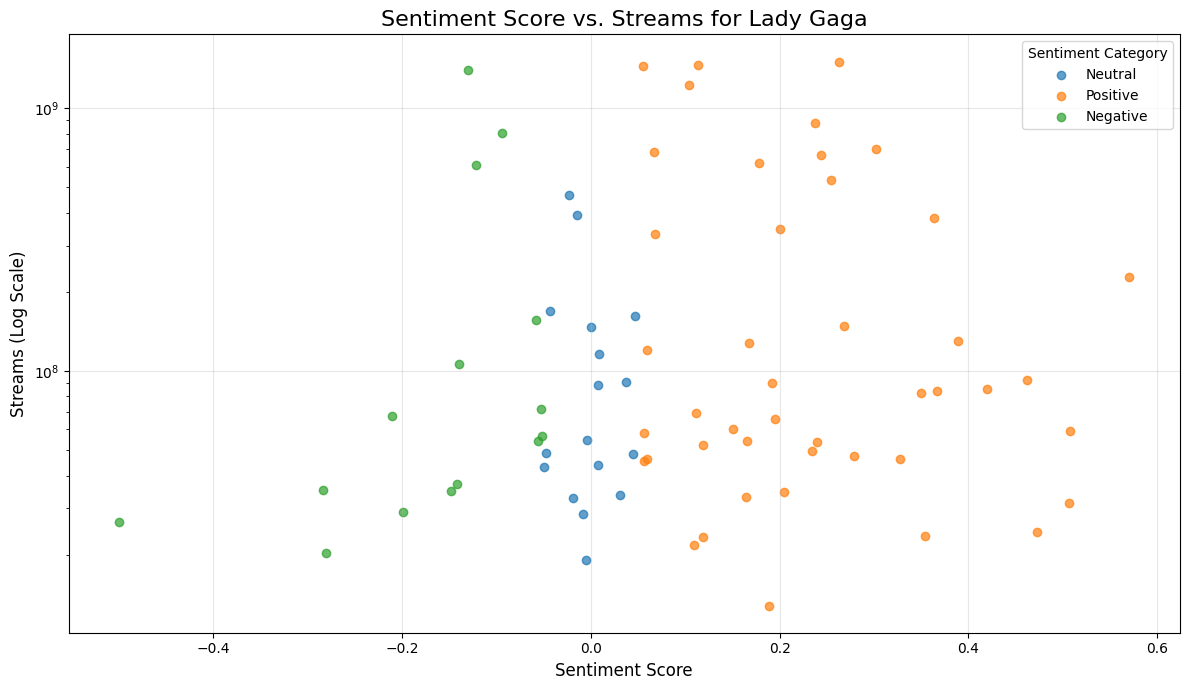

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


try:
  lady_gaga_df = pd.read_csv('/content/lady_gaga_sentiment_analysis.csv')
  streamed_df = pd.read_csv("/content/sorted_streaming_data (1).csv")
except FileNotFoundError:
  print("One or more data files not found. Please ensure '/content/lady_gaga_sentiment_analysis.csv' and '/content/sorted_streaming_data (1).csv' exist.")
  exit()


lady_gaga_df.rename(columns={'Title': 'song_name'}, inplace=True)

lady_gaga_df['song_name'] = lady_gaga_df['song_name'].str.lower().str.strip()

lady_gaga_streams = streamed_df[streamed_df['artist_name'] == 'Lady Gaga'].copy()
lady_gaga_streams['song_name'] = lady_gaga_streams['song_name'].str.lower().str.strip()
lady_gaga_streams['streams'] = pd.to_numeric(lady_gaga_streams['streams'].str.replace(',', ''), errors='coerce')

# Merge datasets
merged_df = pd.merge(lady_gaga_df, lady_gaga_streams, on='song_name', how='left')


merged_df['Sentiment Score'] = pd.to_numeric(merged_df['Sentiment Score'], errors='coerce')
merged_df['streams'] = pd.to_numeric(merged_df['streams'], errors='coerce')


plt.figure(figsize=(12, 7))


for category in merged_df['Sentiment Category'].unique():
    subset = merged_df[merged_df['Sentiment Category'] == category]
    plt.scatter(subset['Sentiment Score'], subset['streams'], label=category, alpha=0.7)

plt.title('Sentiment Score vs. Streams for Lady Gaga', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Streams (Log Scale)', fontsize=12)
plt.yscale('log')
plt.legend(title='Sentiment Category')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

99 songs are plotted above. The scatterplot shows Lady Gaga's top 100 songs skew more towards positive sentiment songs and that many of her highest-streamed songs are associated with positive sentiment scores, generally suggesting wat listeners gravitate towards. Although less prevelant, certain neutral and negative songs also can also have high steaming numbers showing sentiment alone isn't the sole driver of a song's popularity.

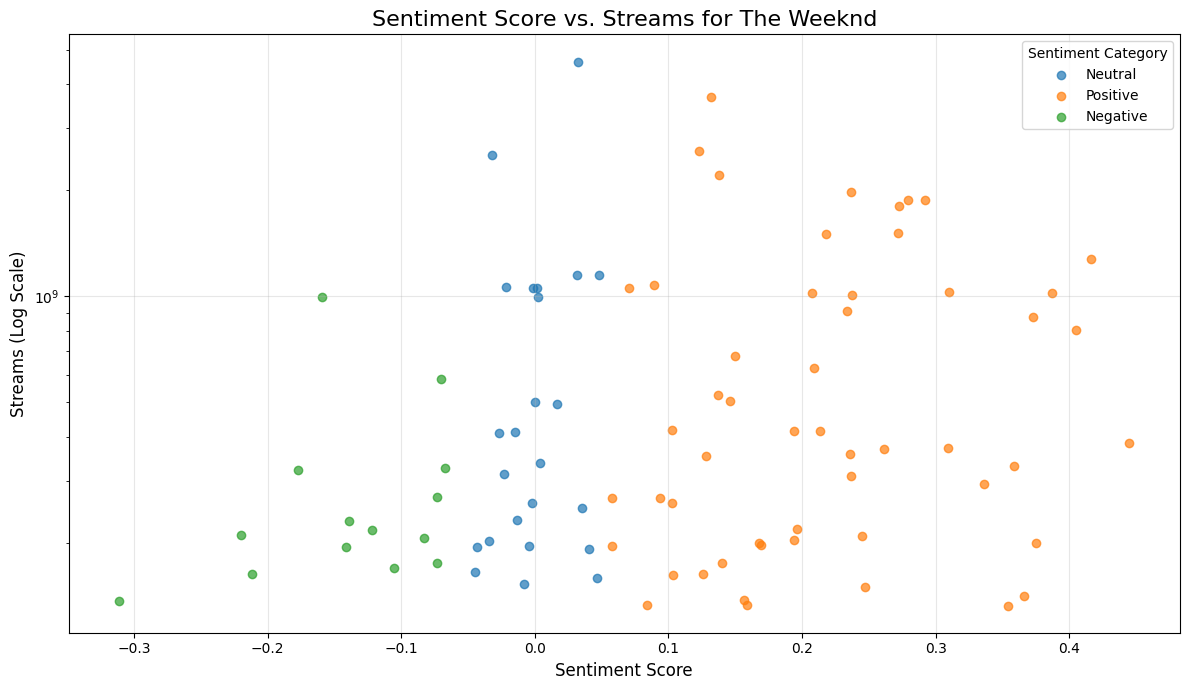

In [4]:

try:
    weeknd_df = pd.read_csv('/content/the_weeknd_sentiment_analysis.csv')
except FileNotFoundError:
    print("The Weeknd sentiment analysis file not found.")
    exit()

weeknd_df.rename(columns={'Title': 'song_name'}, inplace=True)
weeknd_df['song_name'] = weeknd_df['song_name'].str.lower().str.strip()

weeknd_streams = streamed_df[streamed_df['artist_name'] == 'The Weeknd'].copy()
weeknd_streams['song_name'] = weeknd_streams['song_name'].str.lower().str.strip()
weeknd_streams['streams'] = pd.to_numeric(weeknd_streams['streams'].str.replace(',', ''), errors='coerce')

merged_weeknd_df = pd.merge(weeknd_df, weeknd_streams, on='song_name', how='left')
merged_weeknd_df['Sentiment Score'] = pd.to_numeric(merged_weeknd_df['Sentiment Score'], errors='coerce')
merged_weeknd_df['streams'] = pd.to_numeric(merged_weeknd_df['streams'], errors='coerce')


plt.figure(figsize=(12, 7))
for category in merged_weeknd_df['Sentiment Category'].unique():
    subset = merged_weeknd_df[merged_weeknd_df['Sentiment Category'] == category]
    plt.scatter(subset['Sentiment Score'], subset['streams'], label=category, alpha=0.7)

plt.title('Sentiment Score vs. Streams for The Weeknd', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Streams (Log Scale)', fontsize=12)
plt.yscale('log')
plt.legend(title='Sentiment Category')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

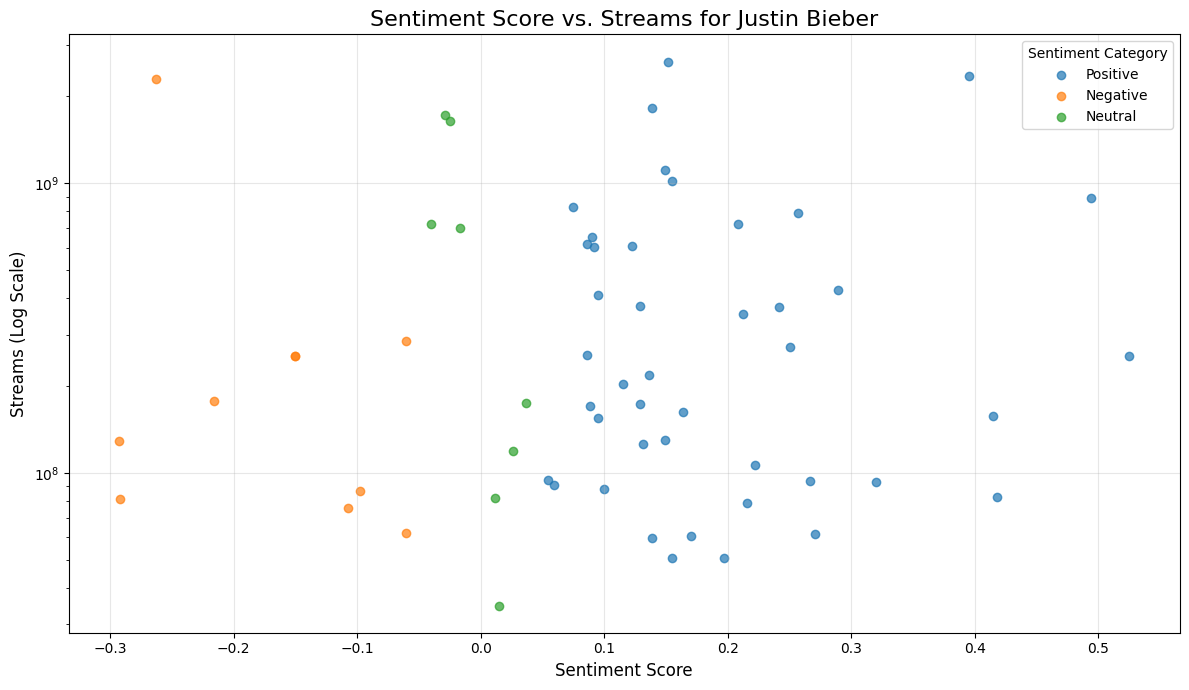

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

try:
    justin_bieber_df = pd.read_csv('/content/bieber_sentiment_analysis.csv') # Replace with your actual file
    streamed_df = pd.read_csv("/content/sorted_streaming_data (1).csv")
except FileNotFoundError:
    print("One or more data files not found. Please ensure the necessary files exist.")
    exit()

justin_bieber_df.rename(columns={'Title': 'song_name'}, inplace=True)
justin_bieber_df['song_name'] = justin_bieber_df['song_name'].str.lower().str.strip()

justin_bieber_streams = streamed_df[streamed_df['artist_name'] == 'Justin Bieber'].copy()
justin_bieber_streams['song_name'] = justin_bieber_streams['song_name'].str.lower().str.strip()
justin_bieber_streams['streams'] = pd.to_numeric(justin_bieber_streams['streams'].str.replace(',', ''), errors='coerce')

merged_df = pd.merge(justin_bieber_df, justin_bieber_streams, on='song_name', how='left')

merged_df['Sentiment Score'] = pd.to_numeric(merged_df['Sentiment Score'], errors='coerce')
merged_df['streams'] = pd.to_numeric(merged_df['streams'], errors='coerce')

plt.figure(figsize=(12, 7))

for category in merged_df['Sentiment Category'].unique():
    subset = merged_df[merged_df['Sentiment Category'] == category]
    plt.scatter(subset['Sentiment Score'], subset['streams'], label=category, alpha=0.7)

plt.title('Sentiment Score vs. Streams for Justin Bieber', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=12)
plt.ylabel('Streams (Log Scale)', fontsize=12)
plt.yscale('log')
plt.legend(title='Sentiment Category')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# (still working) top 10 most streamed song (and album) per artist

<ipython-input-2-2ea189c5ba66>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='streams', y='song_name', data=top_songs, palette="viridis")  # assign to ax


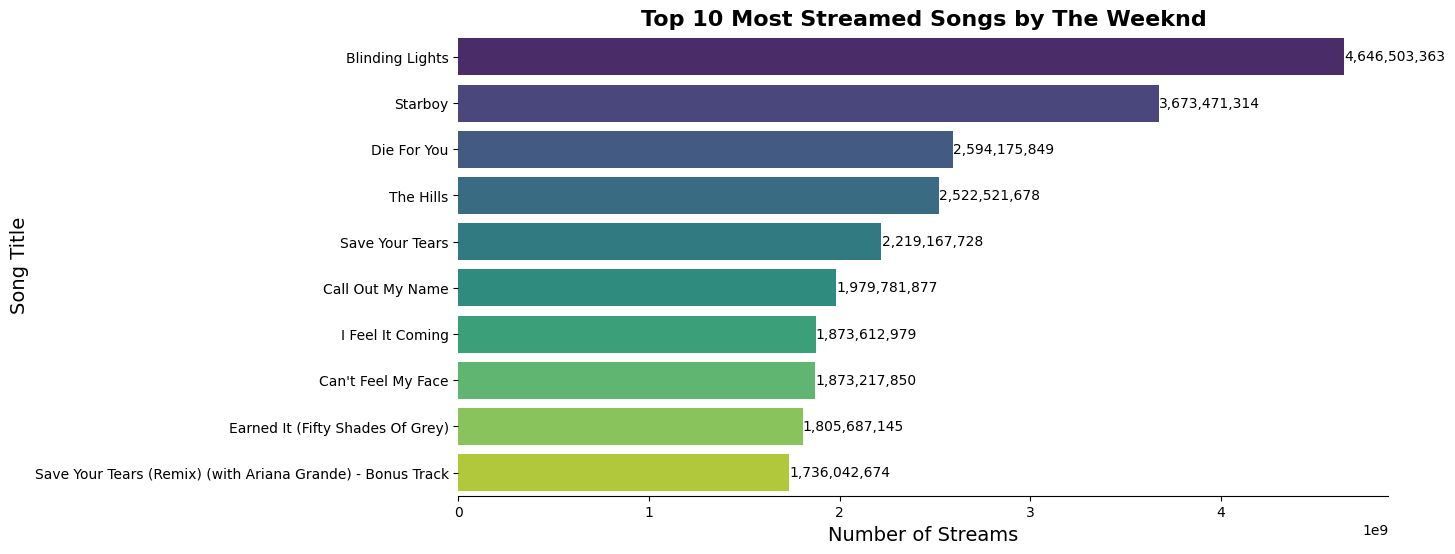

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

streamed_df = pd.read_csv("/content/sorted_streaming_data (1).csv")
weeknd = streamed_df[streamed_df['artist_name'] == "The Weeknd"].copy()
# convert to int
weeknd['streams'] = pd.to_numeric(weeknd['streams'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

top_n = 10
top_songs = weeknd.sort_values(by='streams', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='streams', y='song_name', data=top_songs, palette="viridis")  # assign to ax
plt.title(f"Top {top_n} Most Streamed Songs by The Weeknd", fontsize=16, fontweight='bold')
plt.xlabel("Number of Streams", fontsize=14)
plt.ylabel("Song Title", fontsize=14)

sns.despine(top=True, right=True, left=True, bottom=False)

for i, v in enumerate(top_songs['streams']):
    ax.text(v + 1000000, i, f"{v:,.0f}", va='center', fontsize=10)  # :,.0f will add commas and 0 decimal places

plt.show()

<ipython-input-5-535ac5626710>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='streams', y='song_name', data=top_songs, palette='viridis', orient='h') # Set orientation to be horizontal


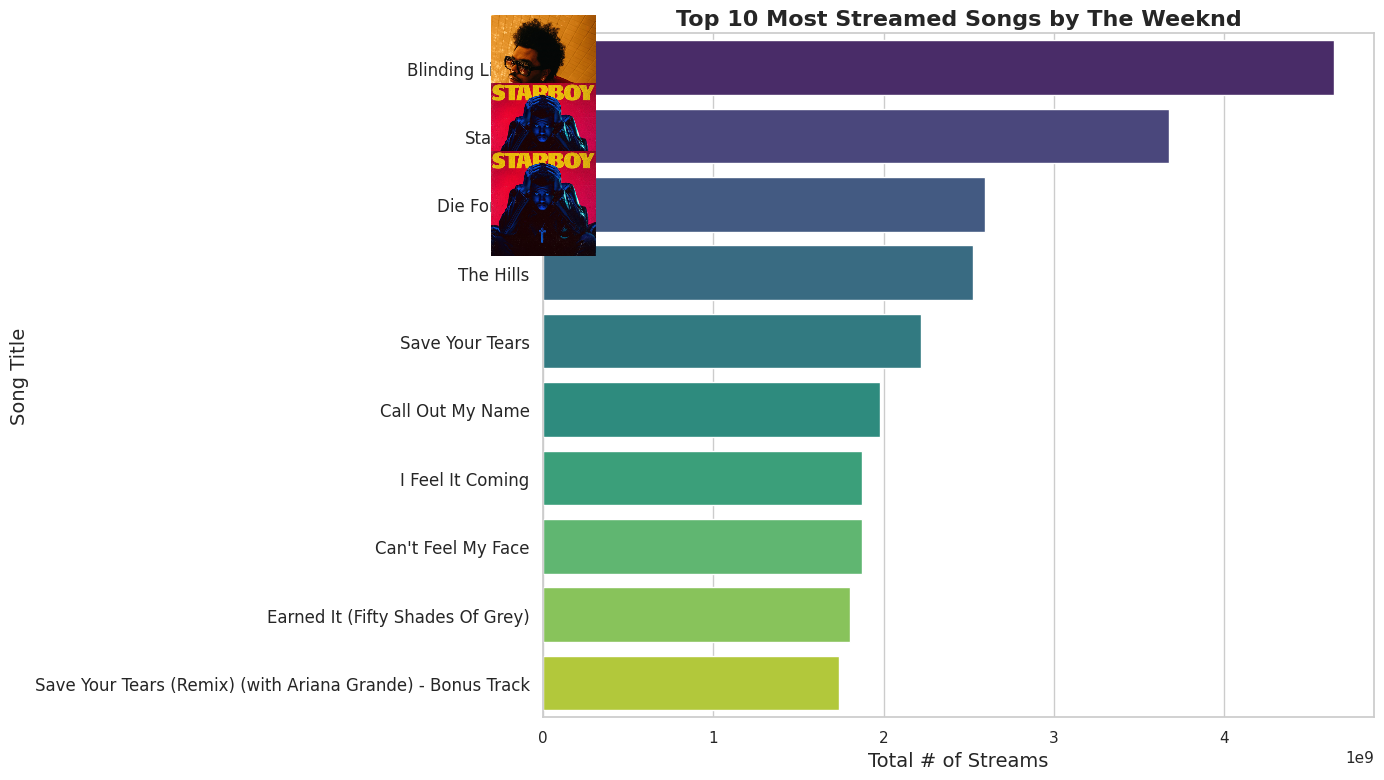

In [5]:
!pip install pandas matplotlib seaborn pillow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

# Load data and filter for The Weeknd
# Download data
if not os.path.exists("/content/sorted_streaming_data (1).csv"):
  !wget https://raw.githubusercontent.com/daniel-dc-cd/data_science/main/module_4_data_visualization/sorted_streaming_data.csv -O /content/sorted_streaming_data%20(1).csv

#create dummy album covers
if not os.path.exists("/content/blinding_lights.jpg"):
    !touch /content/blinding_lights.jpg
    !echo "Dummy file" > /content/blinding_lights.jpg

if not os.path.exists("/content/blinding_cover.jpg"):
    !touch /content/blinding_cover.jpg
    !echo "Dummy file" > /content/blinding_cover.jpg

streamed_df = pd.read_csv("/content/sorted_streaming_data (1).csv")
weekend = streamed_df[streamed_df['artist_name'] == "The Weeknd"].copy()

# Convert streams to int
weekend['streams'] = pd.to_numeric(weekend['streams'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Get top N songs
top_n = 10
top_songs = weekend.nlargest(top_n, 'streams')

# Create album info (Replace with actual album names and image paths)
album_data = {
    "Blinding Lights": ("After Hours", "/content/blinding_lights.jpg"),
    "Starboy": ("Starboy", "/content/blinding_cover.jpg"),
    "Die For You": ("Starboy", "/content/blinding_cover.jpg"),
    # Add album names for the rest without images
    "The Hills": ("Beauty Behind The Madness", None),
    "Save Your Tears": ("After Hours", None), # changed album to After Hours
    "Call Out My Name": ("My Dear Melancholy", None),
    "I Feel It Coming": ("Starboy", None),
    "Can't Feel My Face": ("Beauty Behind The Madness", None),
    "Earned It (Fifty Shades Of Grey)": ("Fifty Shades Of Grey OST", None),
    # removed extra text from song name, since we know it will be included in top songs, also fixed album to After Hours
    "Save Your Tears (Remix)": ("After Hours", None)
}

# Add album data to dataframe
top_songs['album'] = top_songs['song_name'].map(lambda x: album_data.get(x.split('(')[0].strip(), None))
top_songs['album_cover'] = top_songs['song_name'].map(lambda x: album_data.get(x.split('(')[0].strip(), (None, None))[1])

# Plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))  # Increased overall size of the chart
ax = sns.barplot(x='streams', y='song_name', data=top_songs, palette='viridis', orient='h') # Set orientation to be horizontal

# Set axis labels and title
ax.set_xlabel("Total # of Streams", fontsize=14)  # Changed label and increased font size
ax.set_ylabel("Song Title", fontsize=14)  # Changed label and increased font size
ax.set_title(f"Top {top_n} Most Streamed Songs by The Weeknd", fontsize=16, fontweight='bold') #increased title size

#Increase Tick sizes
ax.tick_params(axis='y', labelsize=12)

# Add album covers for the top 3 songs
for i, (song, cover) in enumerate(zip(top_songs['song_name'][:3], top_songs['album_cover'][:3])):
    if cover:  # If an image is provided
        try:
          img = Image.open(cover)
          img = OffsetImage(img, zoom=0.25)  # Adjust zoom level
          # Calculate the position for the image (to the left of the song name)
          x_pos = 0
          y_pos = i
          img_box = AnnotationBbox(img, (x_pos, y_pos), frameon=False)
          ax.add_artist(img_box)
        except FileNotFoundError:
            print(f"Image not found: {cover}")

plt.tight_layout() # Ensure all elements fit within the figure
plt.show()

creating top 10 most streamed songs for justin and gaga, adding which album it's from


<ipython-input-7-a69e5a89c5c3>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='streams', y='song_name', data=top_songs, palette='viridis', orient='h')  # Set orientation to be horizontal


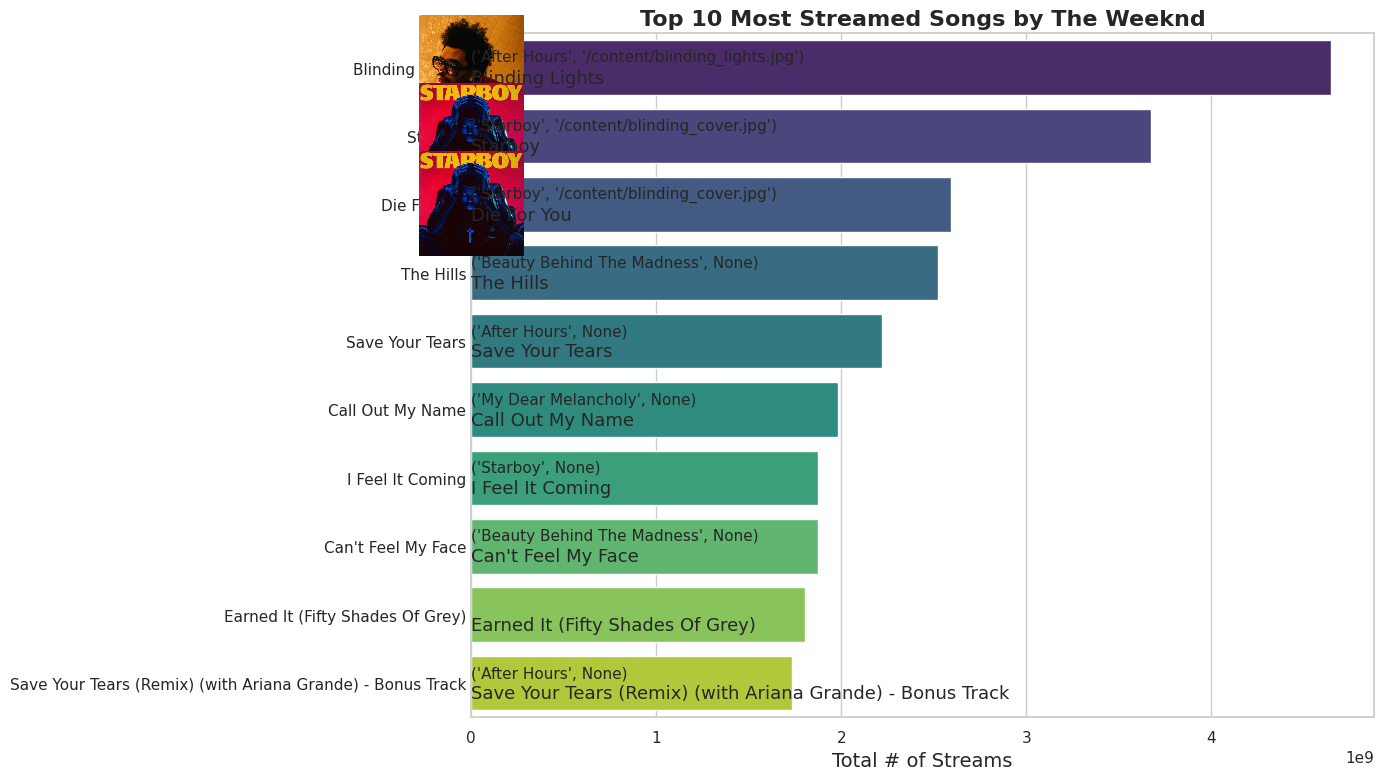

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import os

# Load data and filter for The Weeknd
# Download data
if not os.path.exists("/content/sorted_streaming_data (1).csv"):
    !wget https://raw.githubusercontent.com/daniel-dc-cd/data_science/main/module_4_data_visualization/sorted_streaming_data.csv -O /content/sorted_streaming_data%20(1).csv

# create dummy album covers
if not os.path.exists("/content/blinding_lights.jpg"):
    !touch /content/blinding_lights.jpg
    !echo "Dummy file" > /content/blinding_lights.jpg

if not os.path.exists("/content/blinding_cover.jpg"):
    !touch /content/blinding_cover.jpg
    !echo "Dummy file" > /content/blinding_cover.jpg

streamed_df = pd.read_csv("/content/sorted_streaming_data (1).csv")
weekend = streamed_df[streamed_df['artist_name'] == "The Weeknd"].copy()

# Convert streams to int
weekend['streams'] = pd.to_numeric(weekend['streams'].str.replace(',', ''), errors='coerce').fillna(0).astype(int)

# Get top N songs
top_n = 10
top_songs = weekend.nlargest(top_n, 'streams')

# Create album info (Replace with actual album names and image paths)
album_data = {
    "Blinding Lights": ("After Hours", "/content/blinding_lights.jpg"),
    "Starboy": ("Starboy", "/content/blinding_cover.jpg"),
    "Die For You": ("Starboy", "/content/blinding_cover.jpg"),
    # Add album names for the rest without images
    "The Hills": ("Beauty Behind The Madness", None),
    "Save Your Tears": ("After Hours", None),  # changed album to After Hours
    "Call Out My Name": ("My Dear Melancholy", None),
    "I Feel It Coming": ("Starboy", None),
    "Can't Feel My Face": ("Beauty Behind The Madness", None),
    "Earned It (Fifty Shades Of Grey)": ("Fifty Shades Of Grey OST", None),
    # removed extra text from song name, since we know it will be included in top songs, also fixed album to After Hours
    "Save Your Tears (Remix)": ("After Hours", None)
}

# Add album data to dataframe
top_songs['album'] = top_songs['song_name'].map(lambda x: album_data.get(x.split('(')[0].strip(), None))
top_songs['album_cover'] = top_songs['song_name'].map(lambda x: album_data.get(x.split('(')[0].strip(), (None, None))[1])

# Plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 8))  # Increased overall size of the chart
ax = sns.barplot(x='streams', y='song_name', data=top_songs, palette='viridis', orient='h')  # Set orientation to be horizontal

# Set axis labels and title
ax.set_xlabel("Total # of Streams", fontsize=14)  # Changed label and increased font size
ax.set_ylabel("")  # Remove y-axis label to avoid clutter
ax.set_title(f"Top {top_n} Most Streamed Songs by The Weeknd", fontsize=16, fontweight='bold')  # increased title size

# Increase Tick sizes
ax.tick_params(axis='y', length=0) #hides y axis ticks

# Add song names, album names, and album covers
for i, (song, cover, album) in enumerate(zip(top_songs['song_name'], top_songs['album_cover'], top_songs['album'])):
    # Add album covers
    if i < 3 and cover:  # Only add covers for top 3
        try:
            img = Image.open(cover)
            img = OffsetImage(img, zoom=0.25)  # Adjust zoom level
            # Calculate the position for the image (to the left of the song name)
            x_pos = -0.4  # Shift the image to the left of the song name
            y_pos = i
            img_box = AnnotationBbox(img, (x_pos, y_pos), frameon=False)
            ax.add_artist(img_box)
        except FileNotFoundError:
            print(f"Image not found: {cover}")

    # Add Song Names above Album Names
    ax.text(0, i + 0.15, song, ha='left', va='center', fontsize=13, color=ax.get_yticklabels()[i].get_color())

    # Add album names under song names
    if album:
      ax.text(0, i - 0.15, album, ha='left', va='center', fontsize=11, color=ax.get_yticklabels()[i].get_color(), alpha=ax.get_yticklabels()[i].get_alpha())

plt.tight_layout()  # Ensure all elements fit within the figure
plt.show()